In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Residuals

$e_i = y_i - \hat y_i$

#### The least squares line

$|e_1| + |e_2| +...+ |e_n|$

$e_1^2 + e_2^2 +...+ e_n^2$

### Conditions for the least squares line

- Linearity
- Nearly normal residuals
- Constant variability
- Independent observations

In [2]:
df = pd.read_csv('../data/loan50.csv')

In [3]:
df.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000
2,SC,NaN,36,mortgage,75000,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000
3,CA,0.0,36,rent,75000,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000
4,OH,4.0,60,mortgage,254000,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000


<Axes: xlabel='total_income', ylabel='loan_amount'>

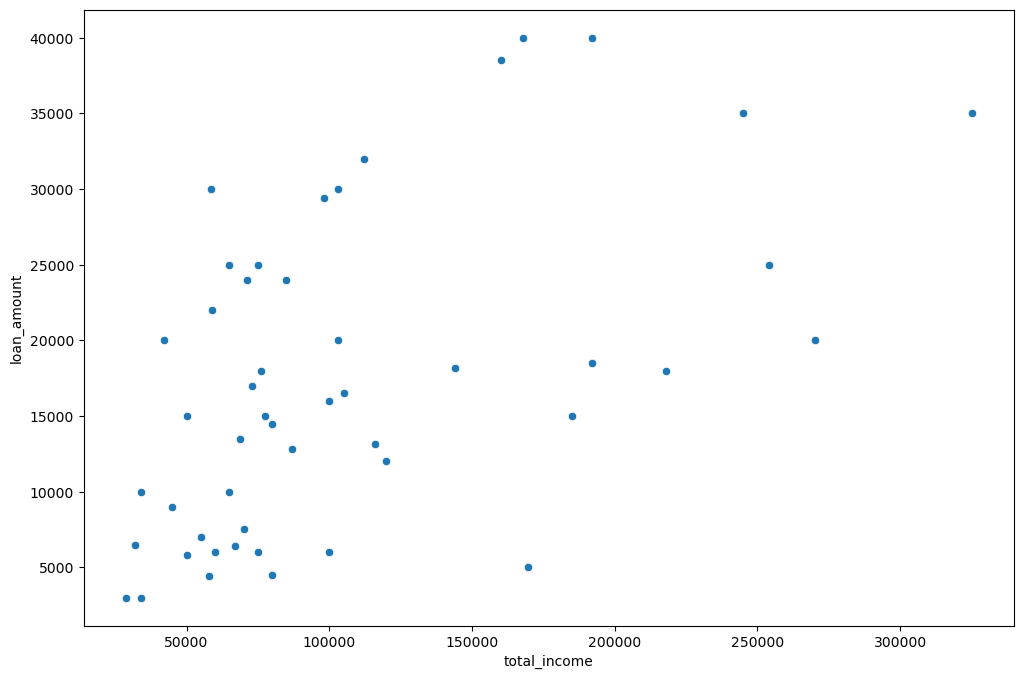

In [4]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="total_income", y="loan_amount")

In [5]:
df[['total_income', 'loan_amount']].describe()

,total_income,loan_amount
count,50.000000,50.000000
mean,105220.560000,17083.000000
std,68141.967716,10455.456343
min,28800.000000,3000.000000
25%,60000.000000,7125.000000
50%,78750.000000,15500.000000
75%,119000.000000,24000.000000
max,325000.000000,40000.000000


### Given x can we predict y

#### Fitting a line to data

$y = \beta_0 + \beta_1x + \epsilon$

#### Estimates

$\large \beta_1 = \frac{s_y}{s_x}R$

#### Correlation

$R = \frac{1}{n-1} \sum_{i=1}^n \frac{x_i - \bar x}{s_x} \frac{y_i - \bar y}{s_y}$

In [6]:
# calculating R
x_bar = df['total_income'].describe().loc['mean']
y_bar = df['loan_amount'].describe().loc['mean']

x_std = df['total_income'].describe().loc['std']
y_std = df['loan_amount'].describe().loc['std']


# print((np.array(df['total_income']) - x_bar)/x_std)

# print((np.array(df['loan_amount']) - y_bar)/y_std)

summation = np.dot((np.array(df['total_income']) - x_bar)/x_std, (np.array(df['loan_amount']) - y_bar)/y_std)

r_val = summation / df.shape[0]

print(f'R:', {r_val})

# calculating b1
b1_val = (y_std/x_std) * r_val

print(f'b1_val:', {b1_val})

R: {0.524431410000258}
b1_val: {0.08046685319020022}


### Slope Formula

$y - y_0 = slope \times (x - x_0)$

#### x_bar and y_bar are on the line

$y - \bar y = slope \times (x - \bar x)$

$y - \bar y = \beta_1 \times (x - \bar x)$

$y = \bar y + \beta_1 \times (x - \bar x)$

$y = \bar y + \beta_1 x - \beta_1 \bar x$

#### We know

$y = \beta_0 + \beta_1x + \epsilon$

$\beta_0 = \bar y - \beta_1 \bar x$

In [7]:
# calculating b0
b0_val = y_bar - b1_val * x_bar

print(f'b0_val:', {b0_val})

b0_val: {8616.232645889346}


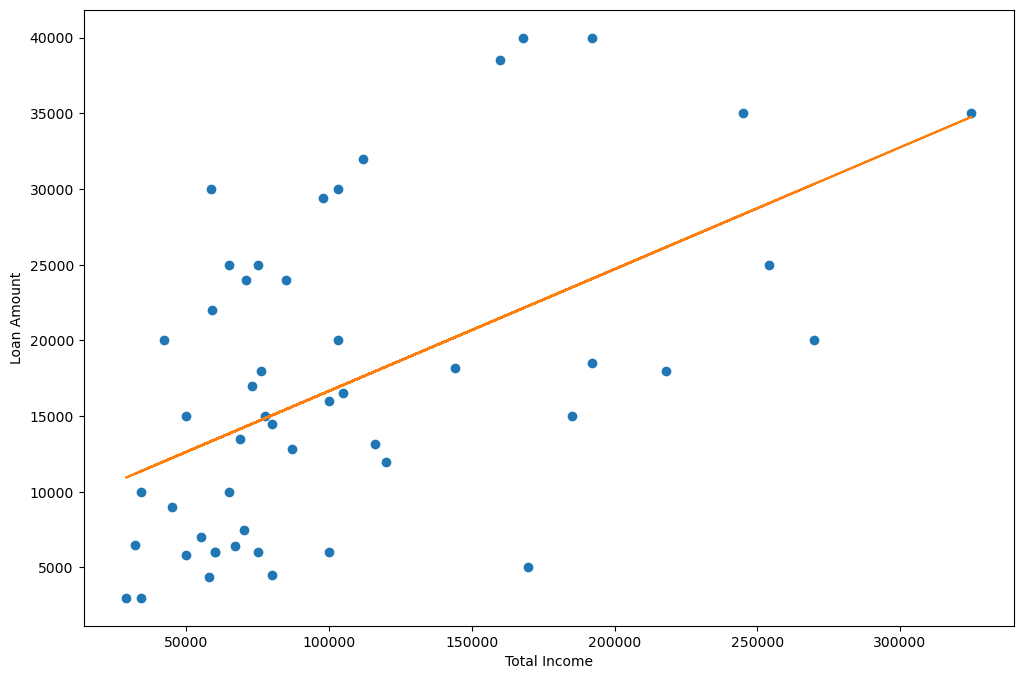

In [8]:
plt.figure(figsize = (12,8))

x = np.array(df['total_income'])
y = np.array(df['loan_amount'])
             
plt.plot(x, y, 'o')

plt.plot(x, b1_val * x + b0_val)

plt.xlabel("Total Income")
plt.ylabel("Loan Amount")

plt.show()

## To Extrapolation or Not?

### Using R2 to describe the strength of a fit or variance explained

$R^2 = \frac{s_y^2 - s_{res}^2}{s_y^2}$

In [9]:
def predict(x):
    return b0_val + b1_val * x

In [10]:
# test dataset
x_test = np.array(df['total_income'])
y_test = np.array(df['loan_amount'])

In [11]:
y_pred = np.array([predict(x) for x in x_test])

In [12]:
residuals = y_test - y_pred

In [13]:
residuals

array([  8636.22301589,  -7444.2438373 ,  10348.75336485,  -8651.24663515,
        -4054.8133562 ,  -7607.51180963,  -7933.67801777,   -553.58090111,
        -1352.10565436,  -5565.86845841,   2509.68707123,  -6272.25502871,
         -662.91796491,   -565.25223086,  -8352.10565436,  12898.01574147,
         -644.30546006,  -2003.45950528, -10662.91796491,   3268.28651166,
       -17257.61733352,  17865.33601816, -10553.58090111,  -8502.60048608,
         8004.15952012, -10342.28300724,  -3846.57810325,  -3237.24103945,
         6669.38832251,  15934.13154159,  -4825.38761595,  14371.47979681,
        -8158.00664135,  13095.68147552,  -8883.31013092,  -6041.90957135,
        11153.42189675,  -4691.17194798,    232.0400673 ,  -6748.9123692 ,
        17009.07084368,   2360.4246946 ,   9670.62077761,   8544.08483294,
        -2816.84887344,  -7444.2438373 ,  16676.45644248,  -6814.5753054 ,
         3095.68147552,    147.58623187])

In [14]:
residuals_std = np.std(residuals)

In [15]:
# calculating R2

r2_val = (y_std**2 - residuals_std**2) / y_std**2
print(r2_val)

0.30052886987075583


In [16]:
# 30% variance of data is explained by Total Income for predicting Loan Amount